# 🎉 **Welcome to the Third Practical on Spectral Transformers**

In this practical, we will explore **Transformers from a spectral perspective**. Love it or hate it, Transformers are the most important deep learning models of today. We will see how we study from a spectral perspective to gain intuition on their propagation behaviour. Hopefully it will be insightful.


🧠 **The Central Question:**

*What happens when we apply a large number of Transformer layers?*  

Understanding the dynamics of this process is not only interesting from an academic perspective but very important also in practice. For instance, modern LLMs can have more than 100 layers! These kind of studies are therefore important to better understand the dynamics and stability of such a process.

**What to Expect:**  
- **🕸️ [Part 1] Spectral Graph Theory:** We will go over some basic spectral graph theory and use this to study a simplified Transformer model. We will see how this sort of spectral analysis can help us understand the attention mechansim from the point of view of how it propagates information. There will be both theory and coding.
- **🕸️ [Part 2] Causal Mechanisms in Large Language Models** As an application, we will see how our analysis can be applied to a modified version of attention used in essentially all LLMs today.


*Note: As this is an advanced machine learning course, some familiarity with Transformers and their underlying mechanisms is expected.*

**Authors:**  
Federico Barbero


##  🕸️ [Part 1] Spectral Graph Theory

One of the main tools we'll use is **spectral graph theory (SGT)**—a field that underpins many modern technologies, from social networks to ranking algorithms like Google's PageRank. In my opinion, it is not an understatement to say that spectral graph theory is one of the most important fields of applied mathematics of the internet age.

For this practical, we focus on the spectral theory of **row-stochastic matrices**. These matrices have rows that sum to 1, just like the probability distributions in **Markov chains**.

🔍 **In Transformers:**  
The attention mechanism normalizes its weights so that each row sums to 1, making it a row-stochastic matrix. By analyzing its eigenvalues and eigenvectors, we can uncover how information flows, is preserved, or even lost across layers.

Let's dive in and see how these spectral insights illuminate the inner workings of attention mechanisms in deep learning! 🚀


#### Predicting the future

We will start by mathematically predicting certain behaviours. We will then hopefully see that our theory matches practice. For the scope of this practical, we will start by making some pretty big simplifications. This is a useful approach because it is usually much easier to study a complex by first studying a more simple construction. A more thorough approach would instead require tools from Random Matrix Theory that are outside the scope of this practical.

**Notation**: Call the input features $\mathbf{V^{(0)}}$. A (simplified) Transformer then computes $\mathbf{V^{(\ell)}}$ as:

$$\mathbf{V^{(\ell + 1)} = \mathbf{A}^{(\ell)}\mathbf{V}^{(\ell)}},$$

where $\mathbf{A}^{(\ell)}$ is the "attention matrix" of the $\ell$-th layer where the entry $\mathbf{A}^{(\ell)}_{i,j}$ is the attention coefficient between $i$ and $j$. Just to orient ourselves, the $\mathbf{A}$ matrices are of dimension $n \times n$ and the $\mathbf{V}$ matrices are of dimension $n \times d$, with $n$ the number of elements (tokens) the Transformer is ingesting and $d$ the hidden dimension.

**Note:**  In this simplified model we strip out a lot of important components such as residual connections, layer normalisations, and MLPs that make the Transformer block. We will later see how these simplifications affect our final results.

### [Task 1 🧠] The form of the entry $\mathbf{A}^{(\ell)}_{i,j}$

Here are a few warmup questions to get familiar with the notation and the structure of $\mathbf{A}$. These simple "lemmas" will be useful for the spectral analysis. Please assume for this question that there is **no attention mask** and that all activations (pre-softmax values) are finite and bounded.

(Q1) What is the form of the entry $\mathbf{A}^{(\ell)}_{i,j}$? For notation, denote the query and key vectors of token $i$ as $q_i$ and $k_i$. Assume we are using the standard dot product attention and applying softmax "row-wise".

(Q2) What does row-stochasticity mean mathematically?

(Q3) Are all entries $\mathbf{A}^{(\ell)}_{i,j} > 0$? Why or why not? You can always assume that the temperature is $\neq 0$ so we can ignore this detail in the practical.

😎 Your answer here:


Q1

$
\mathbf{A}^{(\ell)}_{i,j} = \frac{\exp\big(q_i^{(\ell)} \cdot k_j^{(\ell)}\big)}{\sum_{j'=1}^{n} \exp\big(q_i^{(\ell)} \cdot k_{j'}^{(\ell)}\big)}
$


---

Q2


1.  $\mathbf{A}^{(\ell)}_{i,j} \ge 0$ for all $i, j$.
2. $
   \sum_{j=1}^{n} \mathbf{A}^{(\ell)}_{i,j} = 1 \quad \text{for every } i.
   $

This ensures that each row of the matrix can be interpreted as a probability distribution over the tokens.

--
Q3
Yes, under the assumptions given (i.e., no attention mask and finite, bounded pre-softmax activations), every entry in is strictly positive.

### The Spectrum of a Row-Stochastic Matrix

The $\mathbf{A}$ matrices have important structure. In fact, as we saw before they are row-stochastic and *positive*. This allows us to apply an important theorem called the **Perron-Frobenius theorem** that allows us to derive important properties of the spectrum of $\mathbf{A}$. Your next task will be to figure out what the spectrum looks like!

### [Task 2 🧠] Powers of $\mathbf{A}$

This question will require some light independent research. Feel free to consult any resource you wish. The proofs we require here do not need to be very formal.

**Important: We always assume that $\mathbf{A}$  is nice enough such that it is diagonalizable.** In practice, one can still show similar results without this assumption, but this requires slightly more sophisticated mathematics such as Jordan decompositions.

Let $\mathbf{A}$ be a row-stochastic attention matrix, we now wish to find out some useful information about its spectrum. In particular, we want to know its largest eigenvalue, its largest eigenvector, and the size of the remaining eigenvalues.

(Q1) Show that $\mathbf{A}$ always has an eigenvalue $1$. What is the right
 eigenvector?

**Note: In this practical we assume that the $\mathbf{A}$s are nice enough such that the eigenvalue $1$ only occurs exactly once, i.e. it's a simple eigenvalue (this is pretty much always true anyway, modulo numerical errors)!**

(Q2) Show that $\mathbf{A}$'s largest eigenvalue is $1$. Hint: This can be shown by contradiction or immediately by the Perron-Frobenius theorem. If you are using the Perron-Frobenius theorem please state it clearly and why it applies.

(Q3) Following from this basic spectral analysis in Q1 and Q2, let $\mathbf{A}$ be a row-stochastic attention matrix and each Transformer layer update behave as:

$$\mathbf{V^{(\ell + 1)} = \mathbf{A} \mathbf{V}^{(\ell)}}$$

such that each layer applies the *same* attention matrix. What happens as the number of layers goes to infinity? What subspace is the signal projected into? What does this imply?

Hint: Unroll $\mathbf{V}^{(L)}$ and look at the eigendecomposition of $\mathbf{A}$. You can assume that $\mathbf{A}$ is diagonalizable. We accept hand-wavy arguments, but there needs to be some mathematical reasoning.


😎 Your answer here:

Q1: $\mathbf{A}$ is a row-stochastic matrix, each of its rows sums to 1:
$
\sum_{j=1}^n \mathbf{A}_{i,j} = 1 \quad \text{for all } i.
$
If we take the vector
$
\mathbf{v} = \begin{pmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{pmatrix},
$
then the $i$-th entry of $\mathbf{A}\mathbf{v}$ is
$
(\mathbf{A}\mathbf{v})_i = \sum_{j=1}^n \mathbf{A}_{i,j} \cdot 1 = 1.
$
Thus, we have
$
\mathbf{A}\mathbf{v} = \mathbf{v},
$


---

Q2

There are two intuitive ways to see this:

   If there existed an eigenvalue $|\lambda| > 1$, then repeated application of $\mathbf{A}$ would amplify any component in that eigen-direction. However, since $\mathbf{A}$ maps any probability vector (or bounded vector) to another vector whose entries sum to one (or remain bounded), such unbounded growth is impossible. This contradiction implies that no eigenvalue can have absolute value greater than 1.



---

Q3

If we unroll this recurrence for $L$ layers, we get:
$
\mathbf{V}^{(L)} = \mathbf{A}^L \mathbf{V}^{(0)}.
$

Now, suppose $\mathbf{A}$ is diagonalizable, so that we can write:
$
\mathbf{A} = \mathbf{Q}\Lambda \mathbf{Q}^{-1},
$
with $\Lambda$ a diagonal matrix containing the eigenvalues of $\mathbf{A}$ (including $1$).


Raising $\mathbf{A}$ to the $L$th power gives:  
$$\mathbf{A}^L = \mathbf{Q} \Lambda^L \mathbf{Q}^{-1}.$$  
Since all eigenvalues satisfy $|\lambda| \leq 1$ and $\lambda = 1$ is simple, all other eigenvalues decay as $L \to \infty$ ($\lambda^L \to 0$). Thus, $\mathbf{A}^L$ converges to a rank-one projection matrix:  
$$\lim_{L\to\infty} \mathbf{A}^L = \mathbf{u} \mathbf{w}^T,$$  
where $\mathbf{u}$ is the (normalized) right eigenvector of $1$ (e.g., the all-ones vector) and $\mathbf{w}$ is the corresponding left eigenvector.


As the number of layers increases, the output converges to a uniform representation across tokens, losing token-specific information. This "over-smoothing" explains why deep Transformers require mechanisms like residual connections and layer normalization to retain meaningful signal propagation.




### [Task 3 🧠] Implementing the simplified Transformer model

In the previous section in (Q3), we saw how the signal gets projected into an eigenspace that is poorly informative -- attention matrices are by nature contractive operations that destroy information. Because we were lazy, we had a pretty strong assumption that the *same attention layer* is applied each time. We would now like to see what happens in practice in our simplified Transformer model, where we now have different attention matrices at each layer. Of course, one can show this mathematically as well given the right conditions, but this is more technical and it is anyway nice to see this occuring in code :)

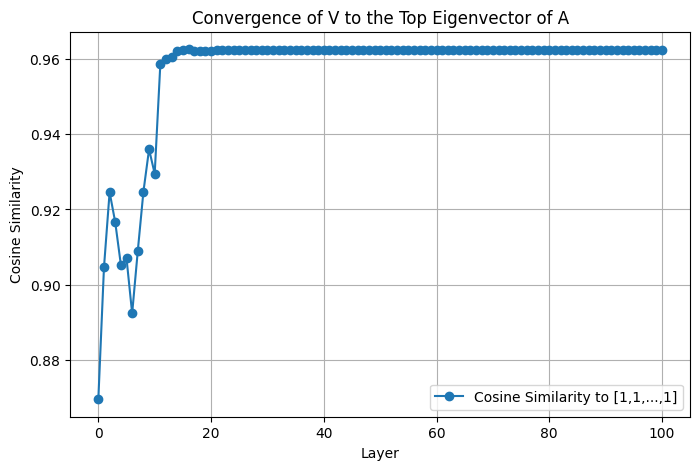

Final vector V after 100 layers:
tensor([0.4329, 0.4840, 0.5267, 0.3126, 0.2100, 0.2717, 0.4914, 0.5737, 0.5711,
        0.3915, 0.4329, 0.4840, 0.5267, 0.3126, 0.2100, 0.2717, 0.4914, 0.5737,
        0.5711, 0.3915, 0.4329, 0.4840, 0.5267, 0.3126, 0.2100, 0.2717, 0.4914,
        0.5737, 0.5711, 0.3915, 0.4329, 0.4840, 0.5267, 0.3126, 0.2100, 0.2717,
        0.4914, 0.5737, 0.5711, 0.3915, 0.4329, 0.4840, 0.5267, 0.3126, 0.2100,
        0.2717, 0.4914, 0.5737, 0.5711, 0.3915, 0.4329, 0.4840, 0.5267, 0.3126,
        0.2100, 0.2717, 0.4914, 0.5737, 0.5711, 0.3915, 0.4329, 0.4840, 0.5267,
        0.3126, 0.2100, 0.2717, 0.4914, 0.5737, 0.5711, 0.3915, 0.4329, 0.4840,
        0.5267, 0.3126, 0.2100, 0.2717, 0.4914, 0.5737, 0.5711, 0.3915, 0.4329,
        0.4840, 0.5267, 0.3126, 0.2100, 0.2717, 0.4914, 0.5737, 0.5711, 0.3915,
        0.4329, 0.4840, 0.5267, 0.3126, 0.2100, 0.2717, 0.4914, 0.5737, 0.5711,
        0.3915])

Attention matrix A (row-stochastic via softmax with temperature):
ten

In [ ]:
from typing import ValuesView
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# =============================================================================
# Task A: Create a random row-stochastic matrix using softmax with a temperature.
# Hint: Generate random logits of shape (n, n) and then apply softmax along the rows
# after dividing by the temperature.
######################
def sample_random_attention_matrix(n, temperature=0.5):
    logits = torch.randn(n, n)
    A = F.softmax(logits / temperature, dim=1)
    return A
######################

# =============================================================================
# Task B: Implement a SimpleTransformerLayer that applies a fixed attention
# matrix A to an input vector V.
# The update rule is: V^(l+1) = A^(l) V^(l)
#
# Then implement the SimpleTransformer that composes the SimpleTransformerLayers.
######################
class SimpleTransformerLayer(nn.Module):
    def __init__(self, A, hidden_dim):
        super().__init__()
        self.A = A  # fixed, precomputed attention matrix
        self.hidden_dim = hidden_dim

    def forward(self, V):
        # V: [n, d] ; Multiply A [n, n] with V [n, d] to get [n, d]
        return self.A @ V

class SimpleTransformer(nn.Module):
    def __init__(self, n, num_layers, temperature, hidden_dim):
        super().__init__()
        # Create a list of transformer layers, each with its own random attention matrix.
        self.layers = nn.ModuleList([
            SimpleTransformerLayer(sample_random_attention_matrix(n, temperature), hidden_dim)
            for _ in range(num_layers)
        ])
        # For inspection, store the attention matrix of the last layer.
        self.A = self.layers[-1].A

    def forward(self, V):
        for layer in self.layers:
            V = layer(V)
        return V
######################

# =============================================================================
# Task C: Compute the cosine similarity between each row of V and the top
# eigenvector (i.e., the constant vector of ones). V has shape [n, d].
# Return the mean cosine similarity.
######################
def cosine_similarity_to_top_eigenvector(V):
    ones = torch.ones(V.shape[1], device=V.device)  # constant vector of ones (d,)
    ones_norm = ones / ones.norm()  # normalized
    V_norm = F.normalize(V, p=2, dim=1)  # normalize each row of V
    cos_sim = (V_norm * ones_norm).sum(dim=1)  # cosine similarity for each token
    return cos_sim.mean()  # average similarity over tokens
######################

def main():
    # Parameters
    n = 10            # Number of tokens
    num_layers = 100  # Number of transformer layers to simulate
    temperature = 0.1 # Temperature parameter for softmax
    hidden_dim = 10

    # Create the SimpleTransformer (each layer has its own attention matrix)
    transformer = SimpleTransformer(n, num_layers, temperature, hidden_dim=hidden_dim)

    # Create an initial random vector V of shape (n x hidden_dim)
    V = torch.rand(n, hidden_dim)

    # List to store the cosine similarity after each layer
    cosine_sims = []
    # Compute similarity before any layer is applied.
    cosine_sims.append(cosine_similarity_to_top_eigenvector(V))

    # Apply layers one-by-one to track convergence.
    for layer in range(num_layers):
        V = transformer.layers[layer](V)
        cosine_sims.append(cosine_similarity_to_top_eigenvector(V))

    # Plot convergence: cosine similarity should approach 1.
    plt.figure(figsize=(8, 5))
    plt.plot(range(num_layers + 1), cosine_sims, marker='o', label="Cosine Similarity to [1,1,...,1]")
    plt.xlabel("Layer")
    plt.ylabel("Cosine Similarity")
    plt.title("Convergence of V to the Top Eigenvector of A")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print final results for inspection
    print("Final vector V after {} layers:".format(num_layers))
    print(V.flatten())
    print("\nAttention matrix A (row-stochastic via softmax with temperature):")
    print(transformer.A)

if __name__ == "__main__":
    main()


### So why do Transformers work?

In the previous questions we saw how our simplified model is in fact very problematic. It turns out that deep Transformers; however, work very well! So what is going on? This question is a very challenging one and good ideas here are likely to result (and have already resulted) in impactful research papers.

In general, Transformer blocks have many more components. They have residual and different kinds of normalisations for example. On top of this, they have MLPs and Positional Encodings. Quite the soup! 🍲

### [Task 4 🧠] Making our Simple Transformer model not as simple

Let's change the Transformer layer by adding layer norm and a residual connection, so that it looks like:

$$\mathbf{V}^{(\ell + 1)} = \text{LayerNorm}\left(\mathbf{A}^{(\ell)}\mathbf{V}^{(\ell)} + \mathbf{V}^{(\ell)}\right) = \text{LayerNorm}\left(\left(\mathbf{A}^{(\ell)} + \mathbf{I} \right)\mathbf{V}^{(\ell)} \right).$$

What do you expect to happen now with the convergence plots?

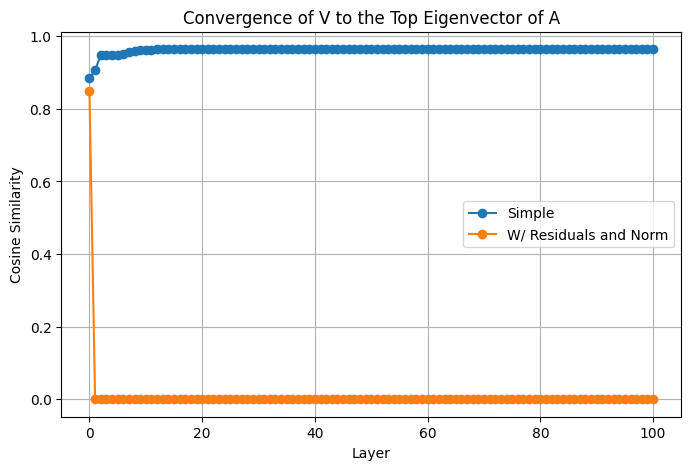

Final vector V after 100 layers:
[ 0.09607042  0.75516355  0.4378149  -0.43343985 -0.48496932  1.130388
 -1.7433572  -0.93603027  1.7971195  -0.61875963  0.09607043  0.7551635
  0.4378149  -0.43343982 -0.48496926  1.130388   -1.7433572  -0.9360302
  1.7971194  -0.61875963  0.09607042  0.75516355  0.4378149  -0.43343988
 -0.48496935  1.130388   -1.7433572  -0.93603027  1.7971195  -0.61875963
  0.09607042  0.75516355  0.4378149  -0.43343985 -0.48496932  1.130388
 -1.7433572  -0.9360302   1.7971196  -0.61875975  0.09607042  0.75516355
  0.4378149  -0.43343985 -0.4849693   1.130388   -1.7433572  -0.93603027
  1.7971196  -0.61875975  0.09607043  0.75516355  0.4378149  -0.43343988
 -0.48496932  1.130388   -1.7433572  -0.93603027  1.7971196  -0.61875975
  0.09607045  0.75516355  0.4378149  -0.43343982 -0.48496926  1.130388
 -1.7433573  -0.9360302   1.7971194  -0.6187597   0.09607043  0.75516355
  0.4378149  -0.43343985 -0.48496932  1.130388   -1.7433572  -0.93603027
  1.7971196  -0.61875975  

In [ ]:
def main():
    # Parameters
    n = 10            # Number of tokens
    num_layers = 100  # Number of transformer layers to simulate
    temperature = 0.1 # Temperature parameter for softmax
    hidden_dim = 10

    plt.figure(figsize=(8, 5))

    for model_type in ["Simple", "W/ Residuals and Norm"]:
        if model_type == "Simple":
            transformer = SimpleTransformer(n, num_layers, temperature, hidden_dim=hidden_dim)
        else:
            transformer = LessSimpleTransformer(n, num_layers, temperature, hidden_dim=hidden_dim)

        # Create an initial random vector V of shape (n x hidden_dim)
        V = torch.rand(n, hidden_dim)

        # List to store the cosine similarity after each layer
        cosine_sims = []
        cosine_sims.append(cosine_similarity_to_top_eigenvector(V).detach().cpu().numpy())

        # Apply one layer at a time to track convergence.
        for layer in range(num_layers):
            V = transformer.layers[layer](V)
            cosine_sims.append(cosine_similarity_to_top_eigenvector(V).detach().cpu().numpy())

        # Plot convergence: cosine similarity should approach 1.
        plt.plot(range(num_layers + 1), cosine_sims, marker='o', label=model_type)

    plt.xlabel("Layer")
    plt.ylabel("Cosine Similarity")
    plt.title("Convergence of V to the Top Eigenvector of A")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print final results for inspection (detach before converting to numpy)
    print("Final vector V after {} layers:".format(num_layers))
    print(V.flatten().detach().cpu().numpy())
    print("\nAttention matrix A (row-stochastic via softmax with temperature):")
    print(transformer.A.detach().cpu().numpy())

if __name__ == "__main__":
    main()


## 🕸️ [Part 2] Causal Mechanisms in Large Language Models

In Part 1, we studied attention mechanisms that are fully connected. In LLMs, Transformers instead use something called a *causal mask* that makes tokens only attend to tokens coming *before* in the sequence. Such Transformers are normally called Decoder-only Transformers due to historical reasons.

This has recently been shown to create *positional effects*, where tokens coming sooner in the sequence are more important (Actually, we wrote about this in a recent NeurIPS paper from the research group: [Transformers need glasses!](https://arxiv.org/abs/2406.04267)). We will now try to get intuition for why this happens remaining faithful to our toy Transformer model.
![](https://drive.google.com/uc?export=view&id=1H8rmh1Q3enFQacmi2pd24F8AjJOdS-1i)

The image above provides some intuition of what is happening. Since the attention mechanism only "attends backwards", this introduces some bias. Intuitively, one cares about the number of paths that reach the final token. Each column here is a Transformer layer, with $\mathbf{v}_1^{(0)}$ being the first input token and $\mathbf{v}_5^{(0)}$ the last. Pictorially, you can see how the blue token ends up dominating the output signal as there are many "blue paths" because it comes sooner in the sequence.

😎 Your answer here:

### [Task 5 💰] (Bonus!) Causal attention mechanisms

(Q1) What extra structure does the causal mechanism impose on the matrix $\mathbf{A}$?.

(Q2) What are the eigenvalues of $\mathbf{A}$?

Note: They can be trivially found by looking at the diagonal (why?). This is related to the answer of (Q1).

(Q3) What are the left and right eigenvector with eigenvalue 1 now? What is the form of this rank-one component? What does this tell you in the limit as you apply more and more layers?

### [Task 6 🧠] Conclusion

This is a chill question! Congrats on getting to the end. Just recap briefly in bullet points what you learnt in this practical about Transformers :-)

😎 Your answer here:

Thanks a lot for your hard work! Congrats for getting to the end of the practical.

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/Thats_all_folks.svg)